# 1. Import Data & Libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/mitchellkubik/Desktop/08-2023 Instacart Basket Analysis'

In [3]:
# Import merged project data

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.8 Grouping Data & Aggregating Variables', 'ords_prods_merge_4.8.pkl'))

In [4]:
# Disregard max number of columns to display 

pd.options.display.max_columns = None

In [5]:
# Check the output

ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,avg_days_between_orders,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,mid range product,regularly busy,regularly busy,average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,mid range product,regularly busy,slowest days,average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,mid range product,regularly busy,slowest days,most orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,mid range product,least busy,slowest days,average orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,mid range product,least busy,slowest days,most orders,10,New customer,6.367797,Low Spender,20.5,Non-Frequent Customer


# 2. Creating Bar Charts

<Axes: >

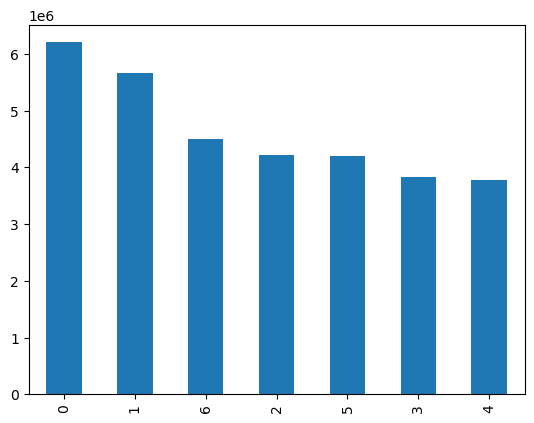

In [6]:
# Create a bar chart of the 'orders_day_of_week' column

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

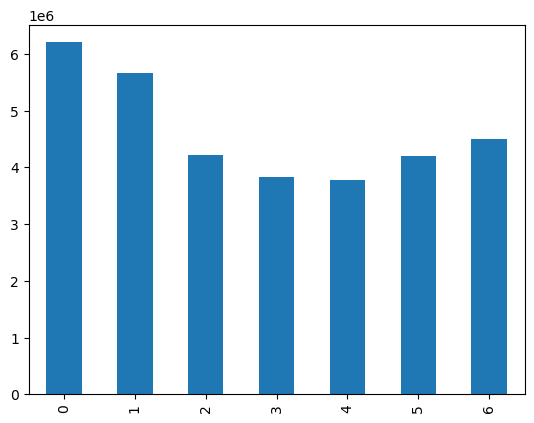

In [7]:
# Use the sort_index() function to order the weekdays sat-fri rather than ordered largest to smallest

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

**Note that the same 'sort_index()' function can be used when printing frequencies as well:**

In [8]:
ords_prods_merge['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [9]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

Text(0, 0.5, 'Order Count')

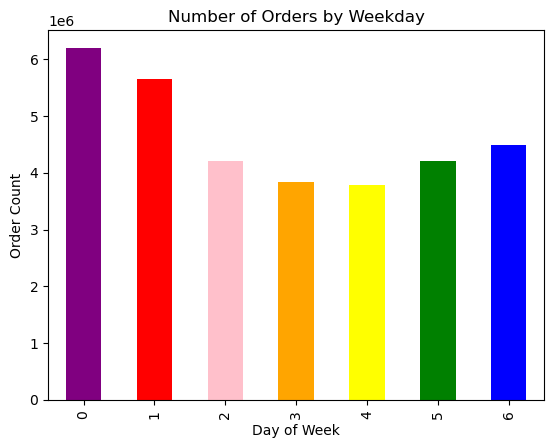

In [10]:
# Add a color argument in your 'plot.bar()' function to make bars more distinct

bar_dow = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.title('Number of Orders by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Order Count')

In [11]:
bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

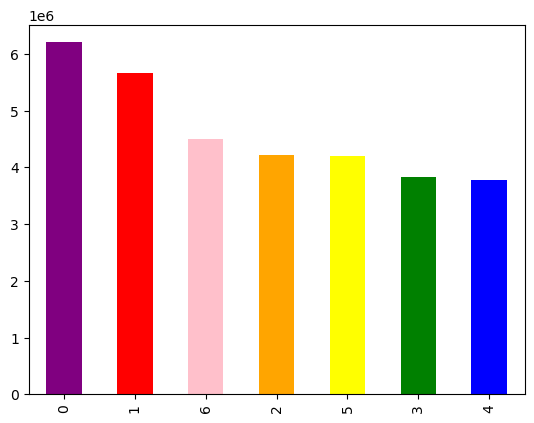

In [12]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [13]:
# Export the visualization outside of Jupyter in the form of an image file

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations' 'bar_orders_dow.png'))

# 3. Creating Histograms & Scatterplots

<Axes: ylabel='Frequency'>

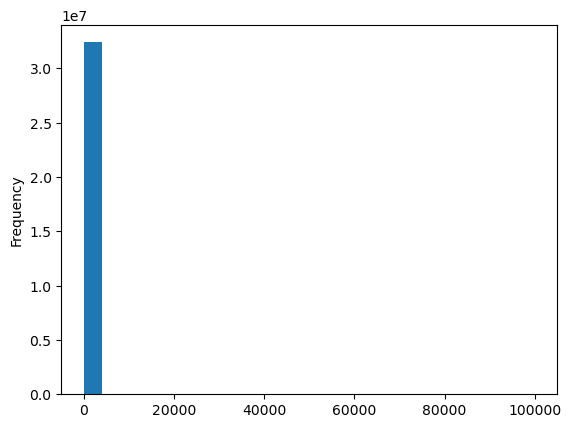

In [14]:
ords_prods_merge['prices'].plot.hist(bins=25)

<Axes: xlabel='prices', ylabel='prices'>

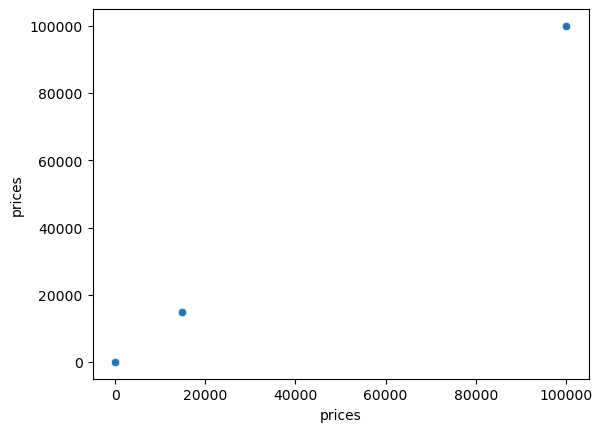

In [15]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [16]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,avg_days_between_orders,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,high range product,regularly busy,regularly busy,most orders,40,Regular customer,108.648299,High Spender,5.0,Frequent Customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,high range product,regularly busy,regularly busy,most orders,40,Regular customer,108.648299,High Spender,5.0,Frequent Customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,high range product,regularly busy,regularly busy,average orders,4,New customer,1154.792308,High Spender,12.0,Regular Customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,high range product,busiest day,busiest days,average orders,4,New customer,1154.792308,High Spender,12.0,Regular Customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,high range product,regularly busy,busiest days,average orders,16,Regular customer,114.426619,High Spender,23.0,Non-Frequent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,both,high range product,busiest day,busiest days,average orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent Customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,both,high range product,busiest day,busiest days,most orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent Customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,both,high range product,regularly busy,slowest days,most orders,15,Regular customer,451.153540,High Spender,5.0,Frequent Customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,both,high range product,regularly busy,slowest days,average orders,12,Regular customer,1178.381871,High Spender,12.0,Regular Customer


In [17]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
ords_prods_merge['prices'].max()

25.0

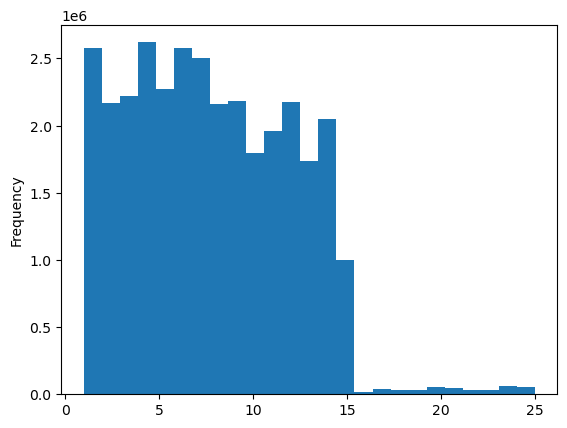

In [19]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

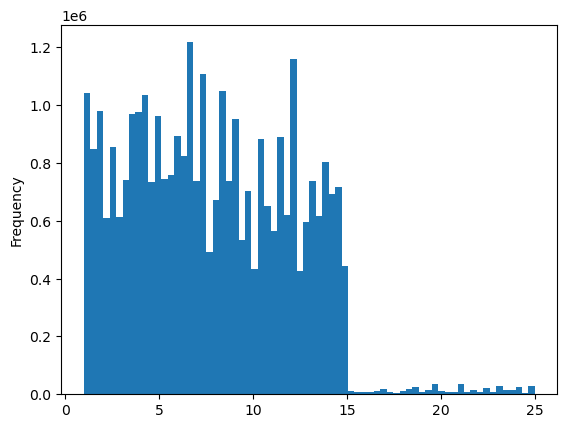

In [20]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [21]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

In [22]:
hist_2.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_2_orders_dow.png'))

# 4. Creating Line Charts

In [23]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [24]:
# Store 70% os the sample in the dataframe big

big = ords_prods_merge[dev]

In [25]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [26]:
# Check the output

len(ords_prods_merge)

32404859

In [27]:
len(big) + len(small)

32404859

In [28]:
df_2 = small[['orders_day_of_week', 'prices']]

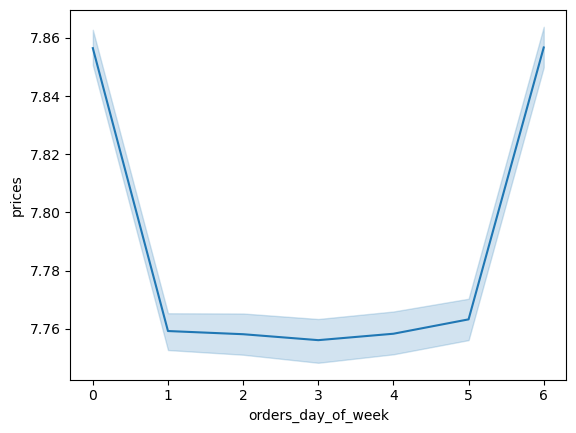

In [29]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [30]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_day_of_week_line.png'))